In [1]:
# 📊 Diabetes Prediction: Exploratory Data Analysis (EDA)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv") 

In [3]:
# --- Overview ---
print("\n📄 Data Preview:")
print(df.head())

print("\n📄 Dataset Info:")
print(df.info())

print("\n📄 Summary Statistics:")
print(df.describe())


📄 Data Preview:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              0         No Info  10.01   
1    Male   8.0             0              0         No Info  10.01   
2    Male  38.0             0              0           never  10.08   
3    Male  11.0             0              0         No Info  10.14   
4    Male  39.0             0              0            ever  10.19   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.0                  100         0  
1          6.0                  140         0  
2          6.1                  130         0  
3          6.1                  160         0  
4          6.5                   85         0  

📄 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-nul

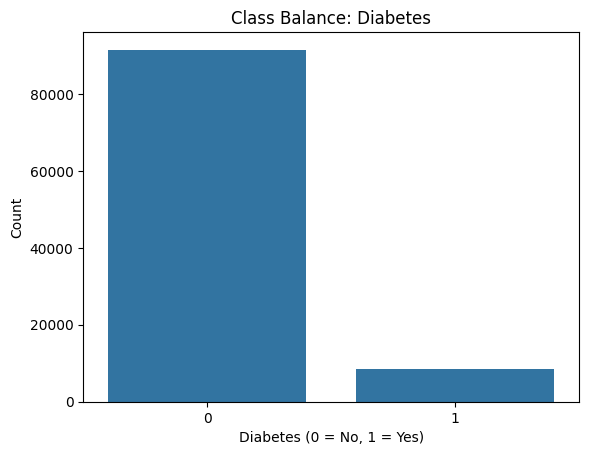

In [4]:
# --- Class Balance ---
sns.countplot(x='diabetes', data=df)
plt.title("Class Balance: Diabetes")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


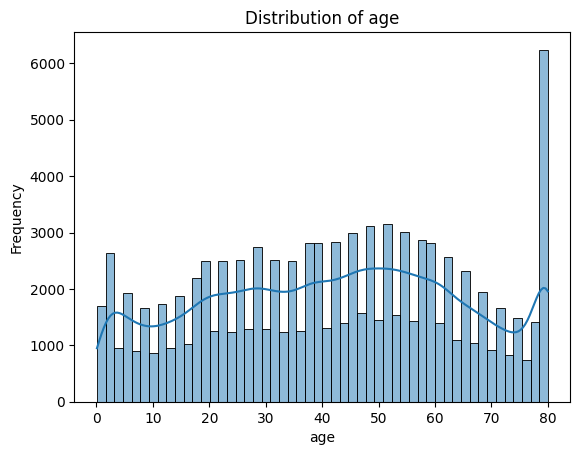

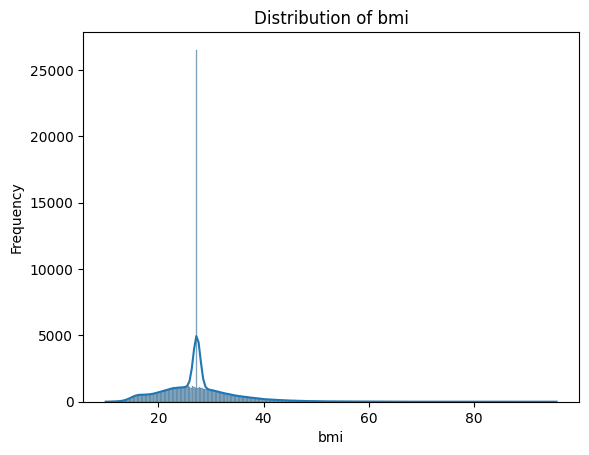

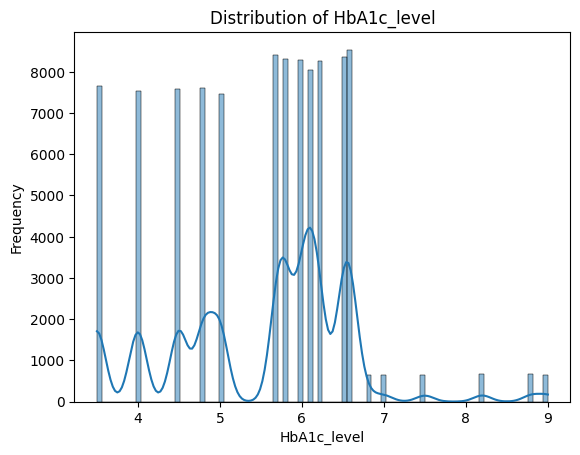

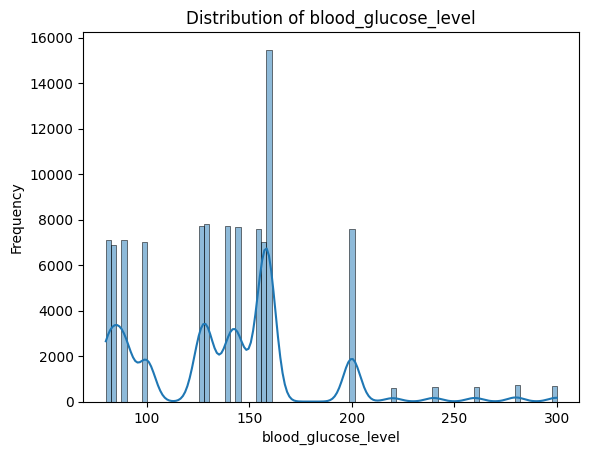

In [6]:
# --- Distribution of Numeric Features ---
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [11]:
# Display the mode of BMI
bmi_mode = df['bmi'].mode()[0]
print(f"Most frequent BMI value (mode): {bmi_mode}")

# Show top 3 most frequent BMI values and their counts
top_bmi_counts = df['bmi'].value_counts().head(3)
print("\nTop 3 most frequent BMI values:")
print(top_bmi_counts)

print(f"Total rows: {len(df)}")
print(f"Percentage with BMI = 27.32: {round((df['bmi'] == 27.32).mean() * 100, 2)}%")

print("📊 Diabetes distribution in full dataset:")
print(df['diabetes'].value_counts(normalize=True))

print("\n📊 Diabetes distribution where BMI = 27.32:")
print(df[df['bmi'] == 27.32]['diabetes'].value_counts(normalize=True))


Most frequent BMI value (mode): 27.32

Top 3 most frequent BMI values:
bmi
27.32    25495
23.00      103
27.12      101
Name: count, dtype: int64
Total rows: 100000
Percentage with BMI = 27.32: 25.5%
📊 Diabetes distribution in full dataset:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

📊 Diabetes distribution where BMI = 27.32:
diabetes
0    0.939949
1    0.060051
Name: proportion, dtype: float64


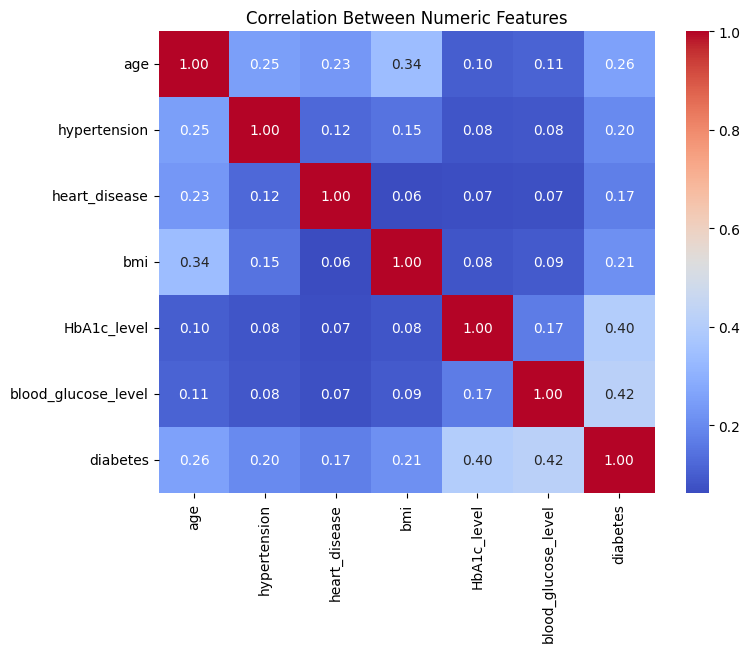

In [7]:
# --- Correlation Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

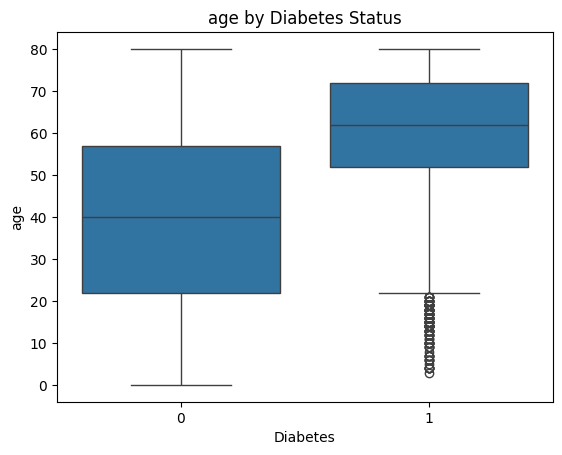

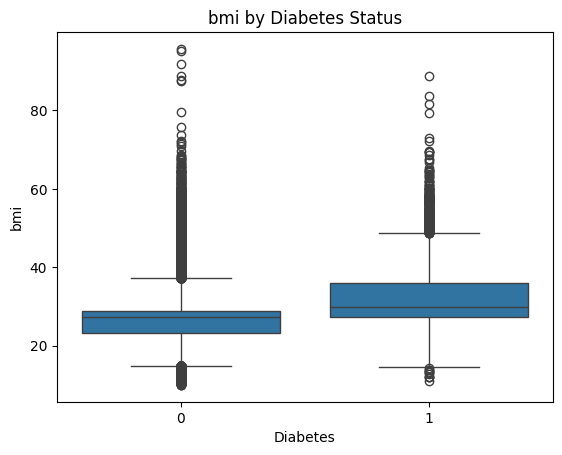

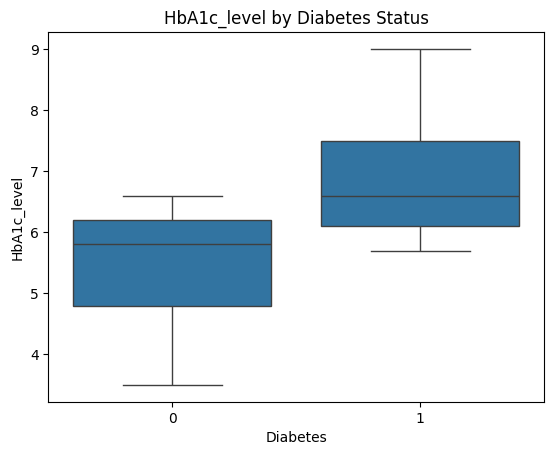

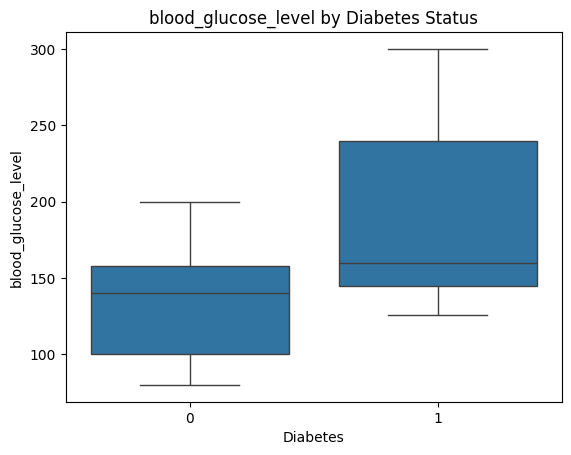

In [8]:
# --- Boxplots by Diabetes Class ---
for col in numeric_cols:
    sns.boxplot(x='diabetes', y=col, data=df)
    plt.title(f"{col} by Diabetes Status")
    plt.xlabel("Diabetes")
    plt.ylabel(col)
    plt.show()


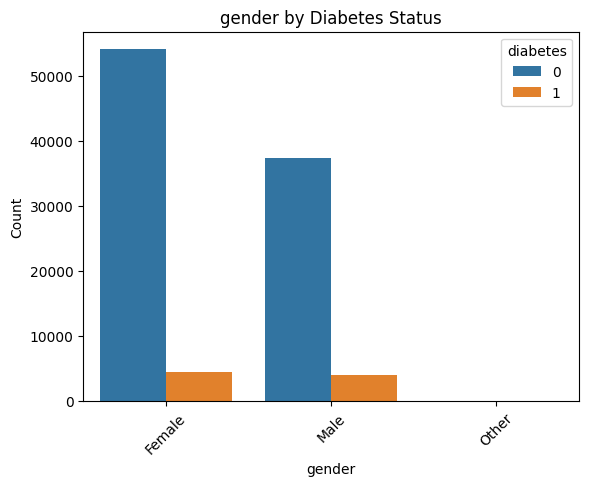

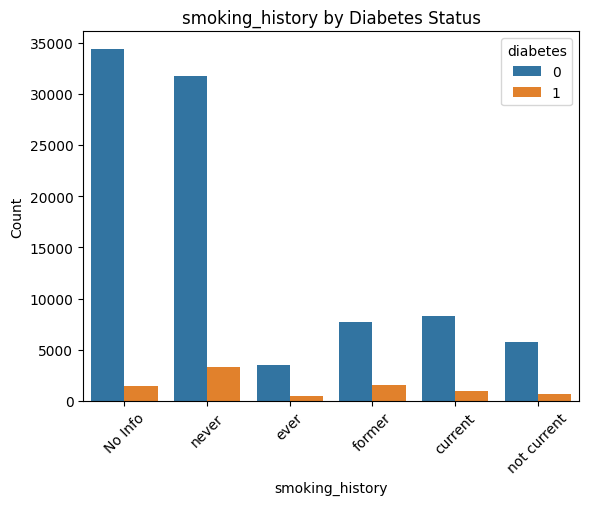

In [9]:
# --- Categorical Features vs Diabetes ---
categorical_cols = ['gender', 'smoking_history']

for col in categorical_cols:
    sns.countplot(x=col, hue='diabetes', data=df)
    plt.title(f"{col} by Diabetes Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


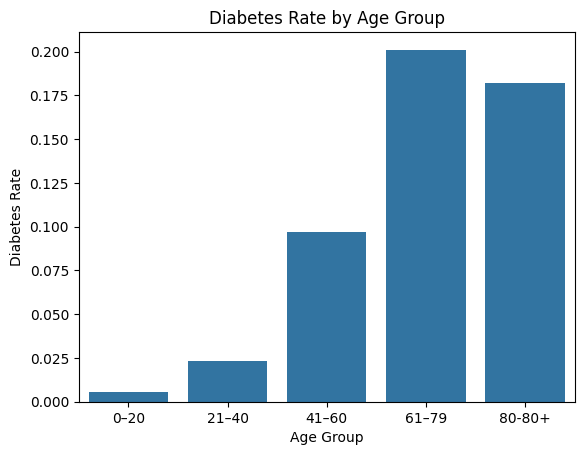

In [15]:
# 1. Define age groups
bins = [0, 20, 40, 60, 80, 150]
labels = ['0–20', '21–40', '41–60', '61–79', '80-80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 2. Calculate diabetes rate per group
age_diabetes_rate = df.groupby('age_group')['diabetes'].mean()

# 3. Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=age_diabetes_rate.index, y=age_diabetes_rate.values)
plt.title('Diabetes Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Diabetes Rate')
plt.show()


Text(0, 0.5, 'Diabetes Rate')

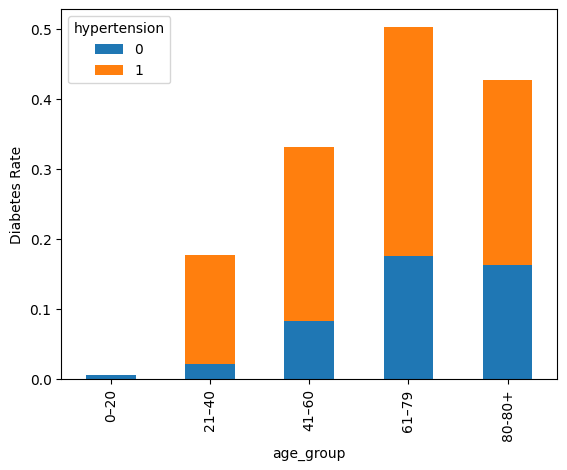

In [17]:
df.groupby(['age_group', 'hypertension'])['diabetes'].mean().unstack().plot(kind='bar', stacked=True)
plt.ylabel("Diabetes Rate")


In [20]:
df[['hypertension', 'heart_disease']].corr()


,hypertension,heart_disease
hypertension,1.000000,0.121262
heart_disease,0.121262,1.000000


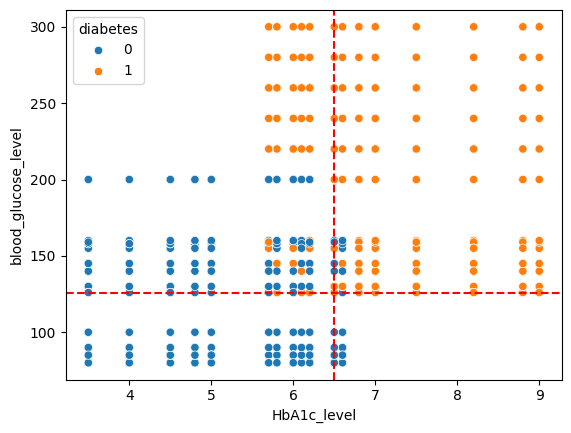

In [22]:
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', hue='diabetes', data=df)
plt.axvline(x=6.5, color='red', linestyle='--')
plt.axhline(y=126, color='red', linestyle='--')